In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import gzip 
EL = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/EL.bed.gz', sep='\t')
samples = pd.read_csv('../data/sample.tsv', sep='\t')
samples_list = EL.columns[6:]
samples = samples.set_index('entity:sample_id')

In [102]:
EL = EL.set_index('pid')

In [6]:
tpm_fh = gzip.open('../code/gtex_tables/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz', 'r')
tpm_fh.readline()
tpm_fh.readline()
tpm_columns = tpm_fh.readline().decode().rstrip().split('\t')

syngr1 = 'ENSG00000100321'
for linea in tpm_fh:
    linea = linea.decode().rstrip().split('\t')
    if linea[0].startswith(syngr1):
        break

In [9]:
tissues = sorted(['Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Cortex',
 'Brain_Frontal_Cortex_BA9',
 'Brain_Putamen_basal_ganglia',
           'Skin_Not_Sun_Exposed_Suprapubic',
           'Liver',
 'Lung', 'Heart_Atrial_Appendage', 'Muscle_Skeletal','Whole_Blood'
          ])
wb_samples = samples.loc[samples.tissue_id.isin(tissues)].index.intersection(EL.columns)
tpm_wb_samples = [x in wb_samples for x in tpm_columns]

pkm_tpm_wb = [float(x) for x in np.array(linea)[tpm_wb_samples]]

tpm_wb_order = []
for i, idx in enumerate(tpm_wb_samples):
    if idx:
        tpm_wb_order.append(tpm_columns[i])

In [71]:

col_colors = []
for col in np.array(samples.loc[tpm_wb_order].tissue_id):
    if 'Brain_Anterior_cingulate_cortex_BA24' in col:
        col_colors.append('goldenrod')
    elif 'Brain_Cortex' in col:
        col_colors.append('gold')
    elif 'Brain_Frontal_Cortex_BA9' in col:
        col_colors.append('yellow')
    elif 'Brain_Putamen_basal_ganglia' in col:
        col_colors.append('khaki')
    elif 'Heart_Atrial_Appendage' in col:
        col_colors.append('darkviolet')
    elif 'Liver' in col:
        col_colors.append('tab:green')
    elif 'Lung' in col:
        col_colors.append('mediumblue')
    elif 'Muscle_Skeletal' in col:
        col_colors.append('lightsalmon')
    elif 'Skin_Not_Sun_Exposed_Suprapubic' in col:
        col_colors.append('turquoise')
    elif 'Whole_Blood' in col:
        col_colors.append('tab:red')
    

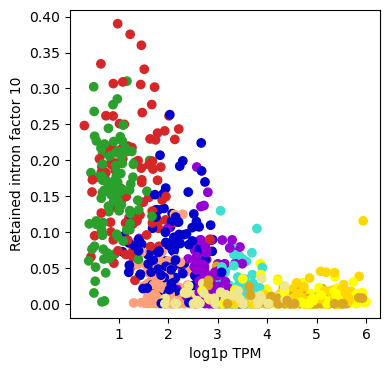

In [108]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(np.log1p(pkm_tpm_wb), 
            np.array(EL.loc[['ENSG00000100321.factor_10'], tpm_wb_order]),
            c = col_colors)

ax.set_xlabel('log1p TPM')
ax.set_ylabel('Retained intron factor 10')

plt.savefig('../code/scratch_figures/figure2/SYNGR1.scatterplot_factor_10.pdf', bbox_inches='tight')
plt.savefig('../code/scratch_figures/figure2/SYNGR1.scatterplot_factor_10.png', bbox_inches='tight', dpi=500)

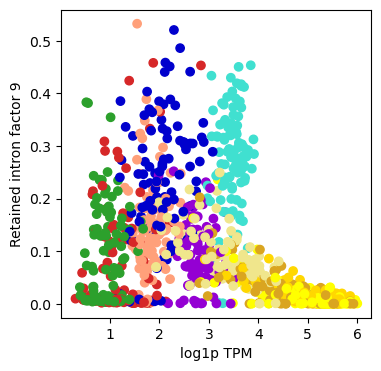

In [109]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(np.log1p(pkm_tpm_wb), 
            np.array(EL.loc[['ENSG00000100321.factor_9'], tpm_wb_order]),
            c = col_colors)

ax.set_xlabel('log1p TPM')
ax.set_ylabel('Retained intron factor 9')

plt.savefig('../code/scratch_figures/figure2/SYNGR1.scatterplot_factor_9.pdf', bbox_inches='tight')
plt.savefig('../code/scratch_figures/figure2/SYNGR1.scatterplot_factor_9.png', bbox_inches='tight', dpi=500)

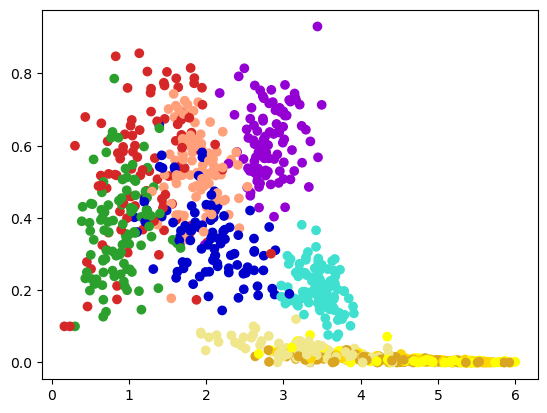

In [79]:
plt.scatter(np.log1p(pkm_tpm_wb), 
            np.array(EL.loc[['ENSG00000100321.isoform_5'], tpm_wb_order]),
            c = col_colors)

In [20]:
qqnorm_ba24 = pd.read_csv('../code/gtex_tables/GTEx_Analysis_v8_eQTL_expression_matrices/Brain_Anterior_cingulate_cortex_BA24.v8.normalized_expression.bed.gz',
                          sep='\t')
qqnorm_ba24.index = qqnorm_ba24.gene_id.apply(lambda x: x.split('.')[0])

In [37]:
ba24_samples = samples.loc[samples.tissue_id == 'Brain_Anterior_cingulate_cortex_BA24'].index

In [39]:
EL_ba24 = EL[EL.columns.intersection(ba24_samples)]

In [44]:
EL_ba24.columns = ['-'.join(x.split('-')[:2]) for x in EL_ba24.columns]

In [53]:
ba24_samples_shared = qqnorm_ba24.columns.intersection(EL_ba24.columns)

In [60]:
EL_ba24.loc[['ENSG00000100321.isoform_3',
             'ENSG00000100321.isoform_4',
             'ENSG00000100321.isoform_5'], ba24_samples_shared].sum(axis=0)

GTEX-11DZ1    0.2738
GTEX-11GSO    0.1701
GTEX-11GSP    0.2737
GTEX-11UD1    0.0250
GTEX-11WQC    0.0667
               ...  
GTEX-T2IS     0.0000
GTEX-X4EP     0.3254
GTEX-YFC4     0.3023
GTEX-ZVT3     0.0022
GTEX-ZVZQ     0.1799
Length: 90, dtype: float64

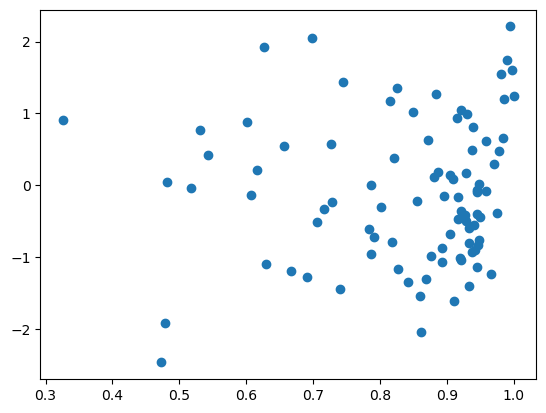

In [62]:
plt.scatter(np.array(EL_ba24.loc['ENSG00000100321.isoform_3', ba24_samples_shared]),
            np.array(qqnorm_ba24.loc['ENSG00000100321', ba24_samples_shared]))

In [54]:
qqnorm_ba24.loc['ENSG00000100321', ba24_samples_shared]

GTEX-11DZ1    0.571638
GTEX-11GSO     1.35419
GTEX-11GSP   -1.201055
GTEX-11UD1   -1.548003
GTEX-11WQC   -1.166919
                ...   
GTEX-T2IS     1.236652
GTEX-X4EP    -2.469942
GTEX-YFC4     2.048199
GTEX-ZVT3    -0.832006
GTEX-ZVZQ    -0.309743
Name: ENSG00000100321, Length: 90, dtype: object

In [32]:
samples.loc[samples.tissue_id == 'Brain_Anterior_cingulate_cortex_BA24'].participant.unique()

array(['GTEX-11DXW', 'GTEX-11DZ1', 'GTEX-11GSO', 'GTEX-11GSP',
       'GTEX-11UD1', 'GTEX-11WQC', 'GTEX-11WQK', 'GTEX-11ZTS',
       'GTEX-11ZVC', 'GTEX-12WSC', 'GTEX-12WSD', 'GTEX-12WSF',
       'GTEX-12WSM', 'GTEX-12ZZW', 'GTEX-12ZZX', 'GTEX-12ZZZ',
       'GTEX-13112', 'GTEX-1313W', 'GTEX-131XH', 'GTEX-131YS',
       'GTEX-139T8', 'GTEX-139TT', 'GTEX-13CF2', 'GTEX-13CIG',
       'GTEX-13CZV', 'GTEX-13FHO', 'GTEX-13FLV', 'GTEX-13IVO',
       'GTEX-13JVG', 'GTEX-13N1W', 'GTEX-13N2G', 'GTEX-13NYB',
       'GTEX-13NYS', 'GTEX-13O3O', 'GTEX-13O3Q', 'GTEX-13OVH',
       'GTEX-13OVL', 'GTEX-13OW5', 'GTEX-13OW7', 'GTEX-13OW8',
       'GTEX-13PLJ', 'GTEX-13PVQ', 'GTEX-13QIC', 'GTEX-13RTJ',
       'GTEX-13RTL', 'GTEX-13S7M', 'GTEX-13SLW', 'GTEX-13VXU',
       'GTEX-13X6I', 'GTEX-13X6J', 'GTEX-13X6K', 'GTEX-1445S',
       'GTEX-144GL', 'GTEX-145LS', 'GTEX-145LU', 'GTEX-145MG',
       'GTEX-145MH', 'GTEX-1477Z', 'GTEX-148VJ', 'GTEX-14BIM',
       'GTEX-14BIN', 'GTEX-14BMV', 'GTEX-14C39', 'GTEX-

In [25]:
qqnorm_ba24

,#chr,start,end,gene_id,GTEX-11DZ1,GTEX-11GSO,GTEX-11GSP,GTEX-11UD1,GTEX-11WQC,GTEX-11WQK,...,GTEX-Y8DK,GTEX-YFC4,GTEX-YJ89,GTEX-Z93S,GTEX-ZAB4,GTEX-ZDXO,GTEX-ZF28,GTEX-ZUA1,GTEX-ZVT3,GTEX-ZVZQ
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232,chr1,29552,29553,ENSG00000227232.5,0.363520,-1.444321,-0.571638,1.827880,0.856191,0.101796,...,-0.221987,0.204660,-0.418371,-1.494155,0.309743,0.958446,2.048199,0.532190,0.653377,1.102440
ENSG00000186092,chr1,69090,69091,ENSG00000186092.4,-0.906134,0.985610,0.455640,0.832006,1.444321,-0.551806,...,-0.170185,-1.134090,-0.958446,-0.084785,-1.071858,-1.606755,0.674490,0.050832,0.632551,0.033880
ENSG00000268903,chr1,135894,135895,ENSG00000268903.1,0.455640,-0.221987,-0.532190,-0.856191,-0.591696,-0.033880,...,0.292021,-0.880888,0.551806,-1.926403,-1.548003,0.204660,0.512776,-0.067799,0.101796,-0.170185
ENSG00000269981,chr1,137964,137965,ENSG00000269981.1,0.274391,0.101796,-0.204660,-0.239380,-2.122643,0.000000,...,0.512776,-0.118836,0.474512,-0.591696,-0.958446,0.084785,-0.067799,-0.739737,-0.717650,-1.236652
ENSG00000241860,chr1,173861,173862,ENSG00000241860.6,0.571638,-0.221987,-0.170185,-0.571638,-0.135911,-0.880888,...,1.273889,0.958446,1.236652,-0.551806,0.880888,0.695908,1.606755,0.832006,-0.474512,1.166919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000224533,chrX,155466539,155466540,ENSG00000224533.4,0.762191,-0.187394,0.399956,-0.958446,-0.067799,-1.744448,...,-1.744448,0.532190,0.363520,0.512776,-1.042247,0.345485,0.418371,0.101796,0.695908,-0.381675
ENSG00000185973,chrX,155669943,155669944,ENSG00000185973.10,-0.591696,0.309743,0.381675,1.494155,0.695908,-1.102440,...,0.551806,-1.042247,-0.739737,-1.354190,1.548003,0.170185,-0.762191,-0.363520,-0.239380,0.067799
ENSG00000168939,chrX,155767811,155767812,ENSG00000168939.11,1.042247,0.239380,0.274391,0.345485,0.221987,-1.354190,...,1.102440,1.397837,0.985610,2.469942,0.050832,0.118836,0.717650,0.309743,-0.204660,-1.071858
